In [1]:
from data.generator import generate_batch, get_vocab_size
from model.lstm import LSTM, DeepLSTM
from model.test import eval_lstm_padded
from train_lstm import step
import torch
from pdb import set_trace

import seaborn as sns
import pandas as pd
from tqdm.notebook import trange

/home/fpetruzzellis/Progetti/lte/src/train_lstm.py:17: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path="../conf/local", config_name="train_lstm")


In [6]:
MAX_ITER = 1500
BS = 16
LR = 0.001
LEN = 2
NES = 1
HID_SIZE = 100
DEVICE = 'cuda'

In [7]:
model = LSTM(
    input_size=get_vocab_size(),
    hidden_size=HID_SIZE,
    output_size=get_vocab_size(),
    batch_size=BS).to(DEVICE)

In [14]:
model = DeepLSTM(
    input_size=get_vocab_size(),
    hidden_size=HID_SIZE,
    output_size=get_vocab_size(),
    batch_size=BS).to(DEVICE)

In [15]:
loss = torch.nn.CrossEntropyLoss(reduction='none')
opt = torch.optim.Adam(model.parameters(), lr=LR)

In [16]:
padded_samples_batch, padded_targets_batch, samples_len, targets_len = generate_batch(length=LEN, nesting=NES, batch_size=BS)
padded_samples_batch, padded_targets_batch = padded_samples_batch.to(DEVICE), padded_targets_batch.to(DEVICE)

In [17]:
metrics = {
    'train_loss': [],
    'train_acc': [],
}

for i_step in trange(MAX_ITER):
    loss_step, acc_step = step(model, padded_samples_batch, padded_targets_batch, samples_len, targets_len, loss, opt, DEVICE)
    metrics['train_loss'].append(loss_step)
    metrics['train_acc'].append(acc_step)

  0%|          | 0/1500 [00:00<?, ?it/s]

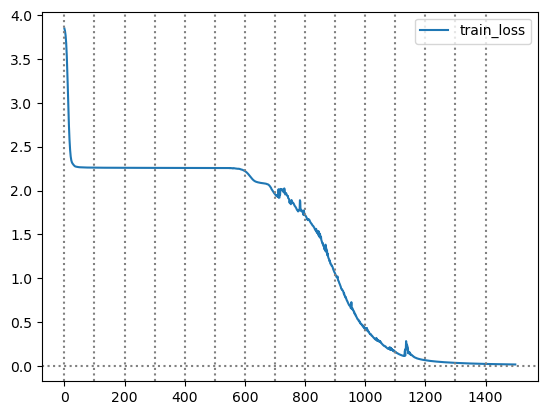

In [18]:
ax = sns.lineplot(pd.DataFrame({k: v for k, v in metrics.items() if 'train_loss' in k}))
_ = ax.axhline(0.0, color='gray', linestyle=":")
for x in range(0, 1500, 100): ax.axvline(x, color='gray', linestyle=":")

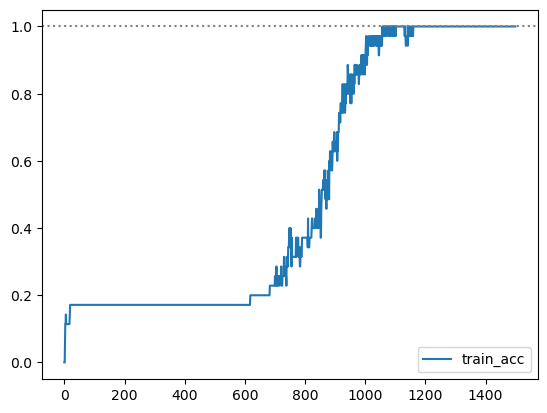

In [19]:
ax = sns.lineplot(pd.DataFrame({k: v for k, v in metrics.items() if 'train_acc' in k}))
_ = ax.axhline(1.0, color='gray', linestyle=":")

In [27]:
eval_lstm_padded(model, padded_samples_batch, padded_targets_batch, samples_len, targets_len, DEVICE)

print((3*6))iiiiiiiiiiiiiiiiiiiiiiii
out: -2
target: 18

